


# Анализ списка разрешений на строительство.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Загружаем данные из файла, взятого с** https://www.kaggle.com/aparnashastry/building-permit-applications-data/version/1 

Data set представляет собой набор данных о разрешениях на строительство с 1 января 2013 года по 25 февраля 2018 года. Данные содержат сведения о номерах разрешений, надзорных округах и текущем статусе заявок. 

Чем интересен этот набор, так это тем, что однозначно не поставить задачу для получения информации, которую нужно извлечь из таблицы. Этот набор полезен, к примеру, для строителей, подрядчиков, агентов по недвижимости, каждый из которых будет искать ответ на свой вопрос из определенных категорий и объема данных. 

Мне стало интересно узнать из этого набора данных, какова стоимость построек в зависимости от их расположения, применения. 









In [24]:
data = pd.read_csv('c:/Users/Novozhilova Nastya/AnacondaProjects/Machine_learning/Building_Permits.csv', sep = ',', engine = 'python')

In [25]:
type(data)

pandas.core.frame.DataFrame

Данных достаточно много, поэтому покажем малую часть.








In [26]:
data[:10]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [27]:
print(data[:10])

  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   
5  201706149344            8            otc alterations permit   
6  201706300814            8            otc alterations permit   
7       M803667            8            otc alterations permit   
8       M804227            8            otc alterations permit   
9       M804767            8            otc alterations permit   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647      

Видим,что данные содержат 43 колонки - 43 различных признака. 
Некоторые признаки не будем принимать во внимание, удалим их из набора.








In [28]:
data = data.drop(['Block', 'Lot', 'Street Number Suffix', 'Unit', 'Unit Suffix', 'Structural Notification','Number of Existing Stories', 'Number of Proposed Stories','Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Revised Cost', 'Existing Units','Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode', 'Location', 'Record ID', 'Issued Date','First Construction Document Date', 'Permit Creation Date', 'Current Status Date', 'Filed Date', 'Permit Type Definition','Street Number','Description', 'Completed Date', 'Existing Construction Type Description', 'Current Status'],axis = 1)

Вновь отобразим данные, теперь с меньшим количеством признаков.








In [29]:
data[:10] 

,Permit Number,Permit Type,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type
0,201505065519,4,Ellis,St,4000.0,tourist hotel/motel,3.0
1,201604195146,4,Geary,St,1.0,tourist hotel/motel,3.0
2,201605278609,3,Pacific,Av,20000.0,retail sales,1.0
3,201611072166,8,Pacific,Av,2000.0,1 family dwelling,5.0
4,201611283529,6,Market,St,100000.0,retail sales,3.0
5,201706149344,8,Indiana,St,4000.0,apartments,1.0
6,201706300814,8,11th,Av,12000.0,apartments,5.0
7,M803667,8,Revere,Av,NaN,NaN,NaN
8,M804227,8,Fell,St,NaN,NaN,NaN
9,M804767,8,Alpine,Tr,NaN,NaN,NaN


Оставили ниже представленные признаки:

- `Permit Number`- номер разрешения
- `Permit Type` - тип разрешения
- `Permit Type Definition`- описание типа разрешения
- `Permit Creation Date`- дата создания разрешения
- `Street Number` - номер улицы
- `Street Name` - название улицы
- `Street Suffix` - уличный суффикс (проспект, улица)
- `Description` - описание
- `Current Status` - текущий статус
- `Current Status Date` - дата текущего статуса
- `Filed Date` - дата подачи
- `Issued Date` - дата выпуска
- `Completed Date` - дата завершения
- `First Construction Document Date` -  дата первой строительной документации
- `Estimated Cost` - оценочная стоимость
- `Existing Use` - использование
- `Existing Construction Type` - тип конструкции
- `Existing Construction Type Description` - описание типа конструкции






In [30]:
data.head()

,Permit Number,Permit Type,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type
0,201505065519,4,Ellis,St,4000.0,tourist hotel/motel,3.0
1,201604195146,4,Geary,St,1.0,tourist hotel/motel,3.0
2,201605278609,3,Pacific,Av,20000.0,retail sales,1.0
3,201611072166,8,Pacific,Av,2000.0,1 family dwelling,5.0
4,201611283529,6,Market,St,100000.0,retail sales,3.0


In [31]:
data.tail()

,Permit Number,Permit Type,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type
198895,M862628,8,Montgomery,St,NaN,NaN,NaN
198896,201712055595,8,Bush,St,5000.0,apartments,5.0
198897,M863507,8,Indiana,St,NaN,NaN,NaN
198898,M863747,8,Sutter,St,NaN,NaN,NaN
198899,M864287,8,Pacific,Av,NaN,NaN,NaN


In [32]:
print(data.shape)
print(data.columns)

(198900, 7)
Index(['Permit Number', 'Permit Type', 'Street Name', 'Street Suffix',
       'Estimated Cost', 'Existing Use', 'Existing Construction Type'],
      dtype='object')


In [33]:
data.index

RangeIndex(start=0, stop=198900, step=1)

Посмотрим на некоторые выбранные данные








In [34]:
data.at[8, 'Street Name']

'Fell'

In [35]:
data['Street Name'][:10]

0      Ellis
1      Geary
2    Pacific
3    Pacific
4     Market
5    Indiana
6       11th
7     Revere
8       Fell
9     Alpine
Name: Street Name, dtype: object

In [36]:
data['Street Name'][12]

'25th'

In [37]:
data['Estimated Cost'].dtype.name

'float64'

In [38]:
type(data['Street Name'][3])

str

In [39]:
type(data['Street Name'])

pandas.core.series.Series

In [40]:
data[['Estimated Cost', 'Street Name']].head()

,Estimated Cost,Street Name
0,4000.0,Ellis
1,1.0,Geary
2,20000.0,Pacific
3,2000.0,Pacific
4,100000.0,Market


Выведем таблицу, содержащую статистическую информацию.








In [41]:
data.describe()

,Permit Type,Estimated Cost,Existing Construction Type
count,198900.000000,1.608340e+05,155534.000000
mean,7.522323,1.689554e+05,4.072878
std,1.457451,3.630386e+06,1.585756
min,1.000000,1.000000e+00,1.000000
25%,8.000000,3.300000e+03,3.000000
50%,8.000000,1.100000e+04,5.000000
75%,8.000000,3.500000e+04,5.000000
max,8.000000,5.379586e+08,5.000000


Диаграмма матрицы рассеивания примет следующий вид:








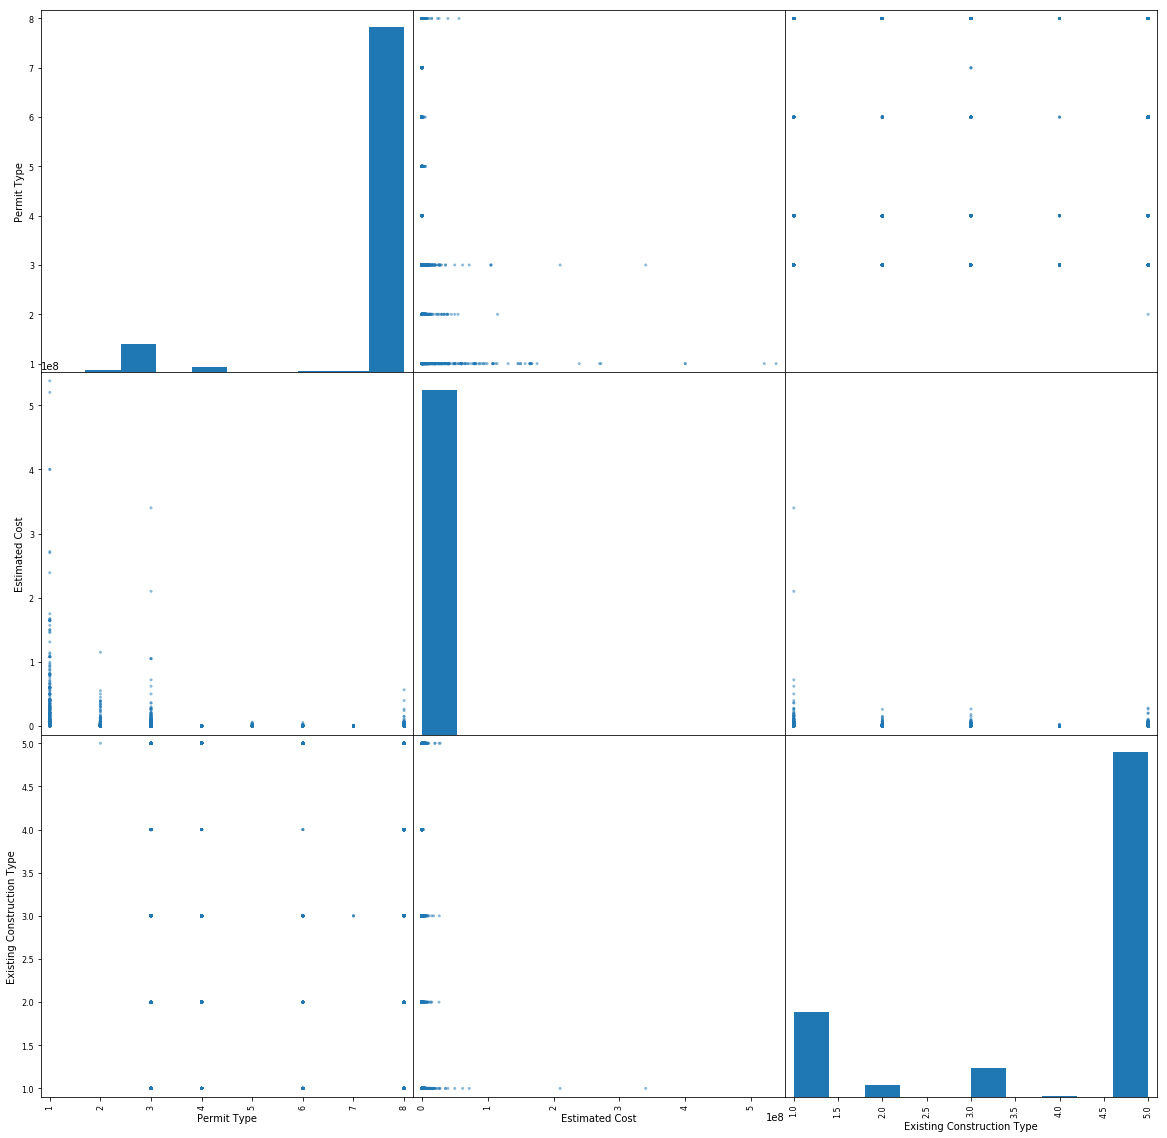

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (20, 20))
pass

Корреляция признаков в таблице:








In [43]:
data.corr()

,Permit Type,Estimated Cost,Existing Construction Type
Permit Type,1.000000,-0.120878,-0.004265
Estimated Cost,-0.120878,1.000000,-0.048703
Existing Construction Type,-0.004265,-0.048703,1.000000


Зависимость типа конструкции от стоимости:








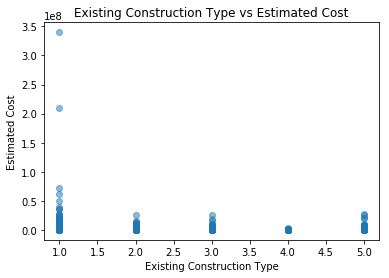

In [46]:
plt.plot(data['Existing Construction Type'], data['Estimated Cost'],  'o', alpha = 0.5)
plt.xlabel('Existing Construction Type')
plt.ylabel('Estimated Cost')
plt.title('Existing Construction Type vs Estimated Cost')
pass

Какие из улиц имеют суффикс 'Av' - проспект?








In [45]:
data['Street Suffix'][:15] == 'Av'

0     False
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: Street Suffix, dtype: bool

In [47]:
data.describe(include = ['object'])

,Permit Number,Street Name,Street Suffix,Existing Use
count,198900,198900,196132,157786
unique,181495,1704,21,93
top,201602179765,Market,St,1 family dwelling
freq,101,5443,138358,46766


In [48]:
data.describe(include = 'all')

,Permit Number,Permit Type,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type
count,198900,198900.000000,198900,196132,1.608340e+05,157786,155534.000000
unique,181495,NaN,1704,21,NaN,93,NaN
top,201602179765,NaN,Market,St,NaN,1 family dwelling,NaN
freq,101,NaN,5443,138358,NaN,46766,NaN
mean,NaN,7.522323,NaN,NaN,1.689554e+05,NaN,4.072878
std,NaN,1.457451,NaN,NaN,3.630386e+06,NaN,1.585756
min,NaN,1.000000,NaN,NaN,1.000000e+00,NaN,1.000000
25%,NaN,8.000000,NaN,NaN,3.300000e+03,NaN,3.000000
50%,NaN,8.000000,NaN,NaN,1.100000e+04,NaN,5.000000
75%,NaN,8.000000,NaN,NaN,3.500000e+04,NaN,5.000000


In [49]:
data['Existing Use'].unique()

array(['tourist hotel/motel', 'retail sales', '1 family dwelling',
       'apartments', nan, '2 family dwelling', 'church', 'storage shed',
       'office', 'vacant lot', 'food/beverage hndlng',
       'residential hotel', 'filling/service stn', 'workshop commercial',
       'clinics-medic/dental', 'misc group residns.', 'hospital', 'club',
       'barber/beauty salon', 'warehouse,no frnitur', 'school',
       'artist live/work', 'manufacturing', 'garment shops',
       'public assmbly other', 'auto repairs', 'lending institution',
       'museum', 'warehouse, furniture', 'prkng garage/private',
       'antenna', 'health studios & gym', 'massage parlor',
       'printing plant', 'parking lot', 'workshop residential',
       'power plant', 'tower', 'mortuary', 'animal sale or care',
       'laundry/laundromat', 'nite club', 'paint store',
       'recreation bldg', 'theater', 'prkng garage/public', 'sign',
       'phone xchnge/equip', 'dance hall', 'sfpd or sffd station',
       'storage

In [50]:
data['Street Name'].unique()

array(['Ellis', 'Geary', 'Pacific', ..., 'Chain Of Lakes', 'Unknown',
       'Ignacio'], dtype=object)



Пару столбцов можем удалить, так как они идентичны с одной категорией и большой роли не играют.


In [51]:
#data.drop(['Issued Date','First Construction Document Date', 'Permit Creation Date', 'Current Status Date', 'Filed Date', 'Permit Type Definition','Street Number','Description', 'Completed Date', 'Existing Construction Type Description'], axis = 1) 

# Подготовка данных

In [52]:
data['Street Name'].dtype.name

'object'

In [53]:
data['Estimated Cost'].dtype.name

'float64'

Разобьем данные на категориальные и числовые характеристики.








In [54]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Permit Number', 'Street Name', 'Street Suffix', 'Existing Use']
['Permit Type', 'Estimated Cost', 'Existing Construction Type']


In [55]:
for c in categorical_columns:
    print(c, data[c].unique())

Permit Number ['201505065519' '201604195146' '201605278609' ... 'M863507' 'M863747'
 'M864287']
Street Name ['Ellis' 'Geary' 'Pacific' ... 'Chain Of Lakes' 'Unknown' 'Ignacio']
Street Suffix ['St' 'Av' 'Tr' 'Ct' 'Bl' 'Wy' 'Dr' nan 'Rd' 'Cr' 'Pl' 'Ln' 'Hy' 'Pk' 'Al'
 'Pz' 'Wk' 'Rw' 'So' 'Sw' 'No' 'Hl']
Existing Use ['tourist hotel/motel' 'retail sales' '1 family dwelling' 'apartments' nan
 '2 family dwelling' 'church' 'storage shed' 'office' 'vacant lot'
 'food/beverage hndlng' 'residential hotel' 'filling/service stn'
 'workshop commercial' 'clinics-medic/dental' 'misc group residns.'
 'hospital' 'club' 'barber/beauty salon' 'warehouse,no frnitur' 'school'
 'artist live/work' 'manufacturing' 'garment shops' 'public assmbly other'
 'auto repairs' 'lending institution' 'museum' 'warehouse, furniture'
 'prkng garage/private' 'antenna' 'health studios & gym' 'massage parlor'
 'printing plant' 'parking lot' 'workshop residential' 'power plant'
 'tower' 'mortuary' 'animal sale or care' 'laun

## Обработка пропущенных значений


Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [56]:
data.median(axis = 0)

Permit Type                       8.0
Estimated Cost                11000.0
Existing Construction Type        5.0
dtype: float64

In [57]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [58]:
data[numerical_columns].count(axis = 0)

Permit Type                   198900
Estimated Cost                198900
Existing Construction Type    198900
dtype: int64

In [59]:
data[categorical_columns].count(axis = 0)

Permit Number    198900
Street Name      198900
Street Suffix    196132
Existing Use     157786
dtype: int64

В колонках есть пропущенные значения. Обработаем их.








In [60]:
data['Existing Use'].describe()

count                157786
unique                   93
top       1 family dwelling
freq                  46766
Name: Existing Use, dtype: object

In [61]:
type(data['Existing Use'].describe())

pandas.core.series.Series

In [62]:
data['Existing Use'].describe().top

'1 family dwelling'

In [63]:
data['Existing Use'] = data['Existing Use'].fillna('1 family dwelling')

In [64]:
data.describe(include = [object])

,Permit Number,Street Name,Street Suffix,Existing Use
count,198900,198900,196132,198900
unique,181495,1704,21,93
top,201602179765,Market,St,1 family dwelling
freq,101,5443,138358,87880


In [65]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [66]:
data.describe(include = [object])

,Permit Number,Street Name,Street Suffix,Existing Use
count,198900,198900,198900,198900
unique,181495,1704,21,93
top,201602179765,Market,St,1 family dwelling
freq,101,5443,141126,87880


Теперь пропущенных значений нет, перейдем к **векторизации**.


In [67]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Permit Number', 'Street Name', 'Street Suffix', 'Existing Use']


In [68]:
data['Street Suffix'].unique()

array(['St', 'Av', 'Tr', 'Ct', 'Bl', 'Wy', 'Dr', 'Rd', 'Cr', 'Pl', 'Ln',
       'Hy', 'Pk', 'Al', 'Pz', 'Wk', 'Rw', 'So', 'Sw', 'No', 'Hl'],
      dtype=object)

In [ ]:
data.at[data['Existing Construction Type Description'] == 'constr type 1', 'Existing Construction Type Description'] = 1
data.at[data['Existing Construction Type Description'] == 'constr type 2', 'Existing Construction Type Description'] = 2
data.at[data['Existing Construction Type Description'] == 'constr type 3', 'Existing Construction Type Description'] = 3
data.at[data['Existing Construction Type Description'] == 'constr type 4', 'Existing Construction Type Description'] = 4
data.at[data['Existing Construction Type Description'] == 'wood frame (5)', 'Existing Construction Type Description'] = 5
data['Existing Construction Type Description'].describe()

In [ ]:
data['Existing Construction Type Description'].unique()

In [69]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns][:5000])
print(data_nonbinary.columns)

Index(['Permit Number_201301027037', 'Permit Number_201301027038',
       'Permit Number_201301027039', 'Permit Number_201301027040',
       'Permit Number_201301027041', 'Permit Number_201301027042',
       'Permit Number_201301027043', 'Permit Number_201301027044',
       'Permit Number_201301027045', 'Permit Number_201301027046',
       ...
       'Existing Use_storage shed', 'Existing Use_storage tanks',
       'Existing Use_theater', 'Existing Use_tourist hotel/motel',
       'Existing Use_tower', 'Existing Use_vacant lot',
       'Existing Use_warehouse, furniture',
       'Existing Use_warehouse,no frnitur', 'Existing Use_workshop commercial',
       'Existing Use_workshop residential'],
      dtype='object', length=5491)


## Нормализация количественных признаков



In [70]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Permit Type,Estimated Cost,Existing Construction Type
count,198900.000000,1.989000e+05,198900.000000
mean,7.522323,1.387255e+05,4.275018
std,1.457451,3.265147e+06,1.453584
min,1.000000,1.000000e+00,1.000000
25%,8.000000,5.000000e+03,5.000000
50%,8.000000,1.100000e+04,5.000000
75%,8.000000,2.500000e+04,5.000000
max,8.000000,5.379586e+08,5.000000


In [71]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [72]:
data_numerical.describe()

,Permit Type,Estimated Cost,Existing Construction Type
count,1.989000e+05,1.989000e+05,1.989000e+05
mean,9.652521e-17,1.430731e-17,-1.052239e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.475158e+00,-4.248645e-02,-2.253063e+00
25%,3.277484e-01,-4.095544e-02,4.987549e-01
50%,3.277484e-01,-3.911785e-02,4.987549e-01
75%,3.277484e-01,-3.483014e-02,4.987549e-01
max,3.277484e-01,1.647154e+02,4.987549e-01


## Соединяем все в одну таблицу

In [77]:
data = pd.concat((data_numerical[:5000], data_nonbinary[:5000]), axis = 1)
print(data.shape)


(5000, 5494)


In [78]:
data.describe()

,Permit Type,Estimated Cost,Existing Construction Type,Permit Number_201301027037,Permit Number_201301027038,Permit Number_201301027039,Permit Number_201301027040,Permit Number_201301027041,Permit Number_201301027042,Permit Number_201301027043,...,Existing Use_storage shed,Existing Use_storage tanks,Existing Use_theater,Existing Use_tourist hotel/motel,Existing Use_tower,Existing Use_vacant lot,"Existing Use_warehouse, furniture","Existing Use_warehouse,no frnitur",Existing Use_workshop commercial,Existing Use_workshop residential
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.048631,-0.022642,0.008243,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.001400,0.000200,0.000400,0.010400,0.000200,0.005000,0.000400,0.002800,0.000400,0.000200
std,0.919432,0.302970,0.988800,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,0.014142,...,0.037394,0.014142,0.019998,0.101459,0.014142,0.070541,0.019998,0.052846,0.019998,0.014142
min,-4.475158,-0.042486,-2.253063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.327748,-0.041262,0.498755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.327748,-0.039118,0.498755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.327748,-0.036974,0.498755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.327748,18.333409,0.498755,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [79]:
X = data.drop(('Existing Construction Type'), axis = 1) # выбрасываем столбец 'Existing Construction Type Description'
y = data['Existing Construction Type']
feature_names = X.columns
feature_names


Index(['Permit Type', 'Estimated Cost', 'Permit Number_201301027037',
       'Permit Number_201301027038', 'Permit Number_201301027039',
       'Permit Number_201301027040', 'Permit Number_201301027041',
       'Permit Number_201301027042', 'Permit Number_201301027043',
       'Permit Number_201301027044',
       ...
       'Existing Use_storage shed', 'Existing Use_storage tanks',
       'Existing Use_theater', 'Existing Use_tourist hotel/motel',
       'Existing Use_tower', 'Existing Use_vacant lot',
       'Existing Use_warehouse, furniture',
       'Existing Use_warehouse,no frnitur', 'Existing Use_workshop commercial',
       'Existing Use_workshop residential'],
      dtype='object', length=5493)

In [80]:
print(X.shape)
print(y.shape)
N, d = X.shape

(5000, 5493)
(5000,)


In [81]:
type(X)

pandas.core.frame.DataFrame

In [82]:
type(y)

pandas.core.series.Series

Разобьем данные на 2 части: тестовую и обучающую, в соотношении 30% и 70%
    

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

3500 1500


In [84]:
print(N_train + N_test)

5000


Обучаем классификатор.
    

In [85]:
from sklearn.neural_network import MLPClassifier

In [91]:
mlp_model = MLPClassifier(hidden_layer_sizes = (2,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)


In [92]:
mlp_model.fit(X_train, y_train)

MemoryError: 

In [93]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

In [ ]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

In [ ]:
print(1 - mlp_model.score(X_test, y_test))

In [ ]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

In [ ]:
alpha_opt = alpha_opt[0]

In [ ]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

In [ ]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass